### `1. K-Means Clustering (Elbow Method)`

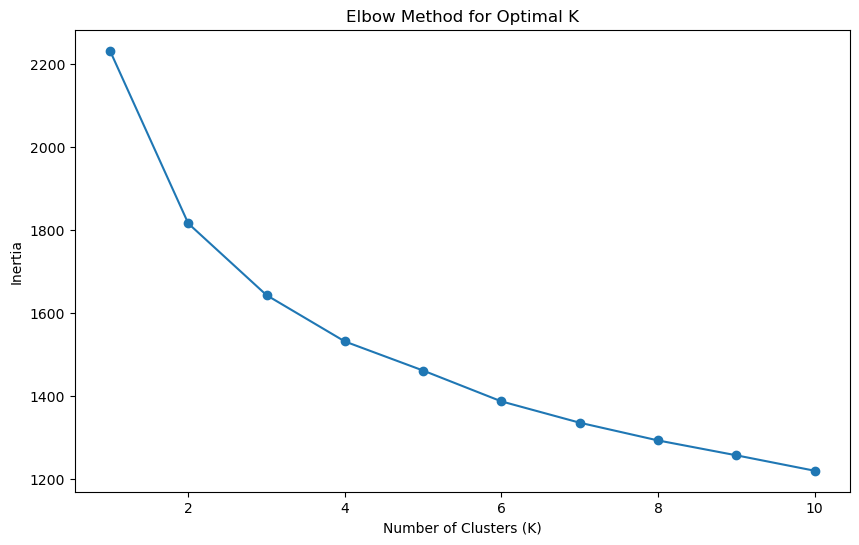

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/cleaned_heart_disease.csv')
X = df.drop('target', axis=1)
y = df['target']

# Find the optimal number of clusters (K) using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

`Decision: Pick the K value at the "elbow" of the curve. It's often 2 or 3 for this dataset.`

In [3]:
# Apply K-Means with the chosen K
k = 2 # Assuming the elbow is at 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Compare clusters with actual labels
cluster_comparison = pd.DataFrame({'Cluster': clusters, 'Actual': y})
print(pd.crosstab(cluster_comparison['Cluster'], cluster_comparison['Actual']))

Actual     0    1
Cluster          
0         41  100
1        123   39


### `2. Hierarchical Clustering (Dendrogram)`

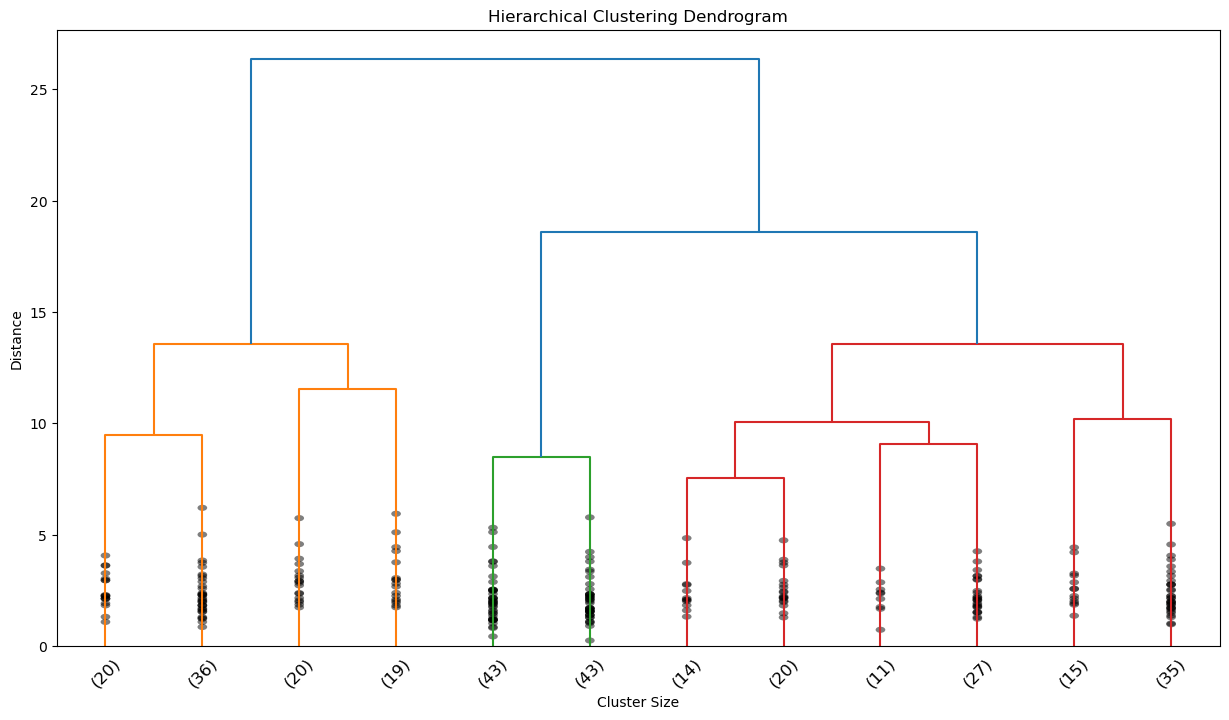

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()